In [1]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import numpy as np


%matplotlib inline

np.random.seed(13515)

# 0. Together

Principle component analysis (PCA) is a method of *dimensionality reduction* that takes the information in multiple variables/predictors, and presents that information (or at least MOST of it) in a smaller number of features. This smaller number of features--called components--are all linear combinations of the original variables, and the features are created in a way (eigendecomposition, if you're interested!) that makes the 1st component contain the MOST variability in the data, the 2nd component contain the second most variability...and so on.

This allows us to choose only a handful of features (usually the first N features) that contain *most* of the information from the original data. This is helpful becuase few features often means faster models.

We discussed 2 ways to choose the number of components that you retain:


* a) **The Elbow Method**: create a scree plot, and find the "elbow" of the graph. Retain all the components at and before the elbow.
* b) **The Percentage Method**: specify a specific % of variance that's acceptable to retain (e.g. 95%), and retain enough components to achieve that %.
    
    
    
<img src="https://drive.google.com/uc?export=view&id=1crCW8BAFVEu50th9VhdJMYakZho03kp0" width = 500px />


# 1. Using PCs as predictors

Using `data`, build a logistic regression model using *all* the variables (V1-V11; make sure you z score) that predicts the variable `Outcome`. Then run PCA on the predictors (V1-V11). Now build a model that uses the first 1,3,5, and 10 components.

* How much variance do the 1,3,5, and 10 components cover?
* How does each model do on train/test accuracy? How do they do compared to the full model?
* What patterns do you observe, and why do you think those patterns exist?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pcaLogit.csv")

predictors = ["V1","V2","V3","V4","V5","V6","V7","V8","V9","V10","V11"]

X = data[predictors]
y = data[["Outcome"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 5464, shuffle=True)

data.head()
### YOUR CODE HERE ###

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,Outcome
0,-0.149337,0.442119,0.576677,1.153935,2.200429,-3.263321,-1.168562,-0.061753,-1.826888,0.152121,-0.780083,1
1,0.814597,-0.071904,2.436344,1.441524,-0.262304,1.088893,0.839062,0.783944,0.398013,-0.243652,2.141202,0
2,0.367023,0.655140,-0.431427,-1.283513,-1.331135,-0.422708,0.399706,-0.376874,0.751164,1.427323,-1.289143,1
3,0.032182,-1.268488,-0.327227,1.398891,-0.871737,0.211705,0.239753,3.127677,-1.364123,-2.663003,0.437166,0
4,-1.092720,-0.093706,-0.744864,0.891042,-0.212384,0.086259,0.382121,1.322998,-0.629167,-1.198671,0.699633,0


In [17]:
z = StandardScaler()

XZ_train = z.fit_transform(X_train)
XZ_test = z.transform(X_test)
XZ = z.transform(X)

XZ

array([[ 0.05386682,  0.34575212,  0.54841162, ..., -1.69131431,
         0.26259088, -0.74993597],
       [ 1.00745542, -0.22314353,  2.290893  , ...,  0.4617303 ,
        -0.12770864,  2.03726174],
       [ 0.56468494,  0.58151286, -0.39616774, ...,  0.80347565,
         1.52015657, -1.23562944],
       ...,
       [ 0.91838401, -0.21327471, -0.48701842, ..., -0.01542785,
        -0.07222997, -0.54980351],
       [ 0.45399931, -0.93115117,  0.70871023, ..., -2.26328365,
        -0.83481241, -1.36244836],
       [ 0.69335524,  0.12604344,  1.99968428, ...,  0.97414599,
        -0.00640052,  1.78904614]])

In [4]:
lr = LogisticRegression()

lr.fit(XZ_train, y_train)

lr.coef_

array([[ 1.219333  , -0.30326716,  0.81970829, -0.67165531,  1.04993152,
        -1.54344015,  0.84084454, -0.3689597 , -0.69588004,  0.99472642,
        -0.85911381]])

0.9


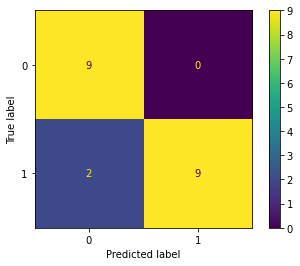

In [5]:
print(accuracy_score(lr.predict(XZ_test), y_test))
plot_confusion_matrix(lr, XZ_test, y_test)

0.975


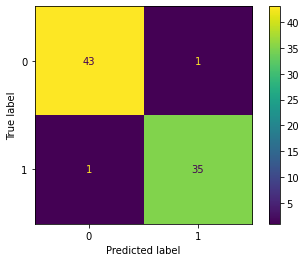

In [6]:
print(accuracy_score(lr.predict(XZ_train), y_train))
plot_confusion_matrix(lr, XZ_train, y_train)

In [9]:
pca = PCA()

pca.fit(XZ)

PCA()

In [10]:
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_,
                      "pc" : range(1,12),
                      "cum_var" : pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,expl_var,pc,cum_var
0,0.249085,1,0.249085
1,0.198246,2,0.447331
2,0.170230,3,0.617561
3,0.131736,4,0.749297
4,0.098582,5,0.847880


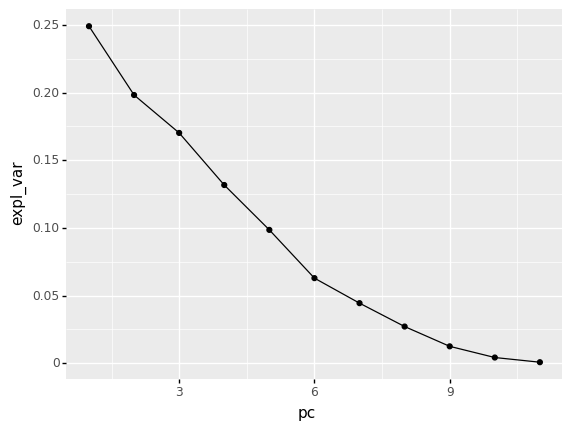

<ggplot: (82107619467)>

In [11]:
(ggplot(pcaDF, aes(x = "pc" , y = "expl_var")) + geom_point() + geom_line())

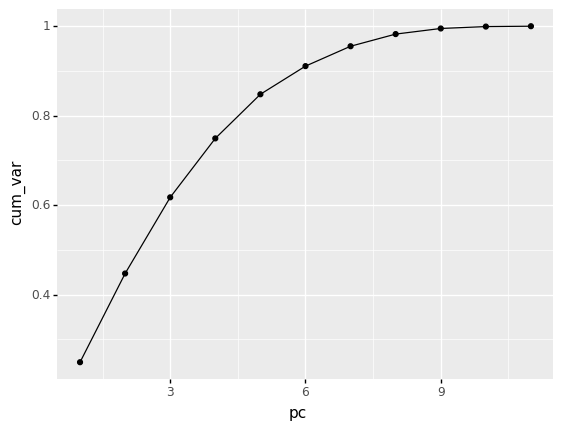

<ggplot: (82107442562)>

In [12]:
(ggplot(pcaDF, aes(x = "pc" , y = "cum_var")) + geom_point() + geom_line())

In [33]:
pcomps1 = pca.transform(XZ)
pcomps1 = pd.DataFrame(pcomps1[:,0:1])

lr1 = LogisticRegression()
lr1.fit(pcomps1, y)
print("1 PC: " , lr1.score(pcomps1, y))


1 PC:  0.75


In [35]:
pcomps3 = pca.transform(XZ)
pcomps3 = pd.DataFrame(pcomps3[:,0:3])

lr3 = LogisticRegression()
lr3.fit(pcomps3, y)
print("3 PCs: " , lr3.score(pcomps3, y))

3 PCs:  0.89


In [36]:
pcomps5 = pca.transform(XZ)
pcomps5 = pd.DataFrame(pcomps5[:,0:5])

lr5 = LogisticRegression()
lr5.fit(pcomps5, y)
print("5 PCs: " , lr5.score(pcomps5, y))

5 PCs:  0.95


In [37]:
pcomps10 = pca.transform(XZ)
pcomps10 = pd.DataFrame(pcomps10[:,0:10])

lr10 = LogisticRegression()
lr10.fit(pcomps10, y)
print("10 PCs: " , lr10.score(pcomps10, y))

10 PCs:  0.95


# 2. PCA with different variable correlations

You can grab all pairwise correlations between variables/features in your model by using the command [`df.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) where `df` is your dataframe.

For the following datasets:

1. Z score the data.
2. Look at the correlations between all the variables in the dataframe. Are they high? low?
3. Perform PCA
4. Make a Scree plot (be sure to add `+ ylim(0,1)`. What do you notice about the patterns in the screeplot? How do those relate to the correlations you saw?

<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />


TIP: to make the scree plot more clear, it can help to add the row [0,0,0] to your dataframe of the explained/cumulative variance. You can do this with:

In [ ]:
# # THIS CODE WON'T RUN, it's just an example of how to do this
# pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_, "pc": range(1,12), "cum_var": pca.explained_variance_ratio_.cumsum()})

# # add zeros
# pcaDF = pcaDF.append(pd.DataFrame({"expl_var" : [0], "pc": [0], "cum_var": [0]}))

In [11]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca0.csv")
d1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,-0.589325,-0.962855,-0.409353,-0.481657,0.391220,-0.261497,0.845311,-0.630942,0.105109,-1.114231,0.819604
1,-0.585161,0.303280,-0.754514,1.478001,-0.230236,-1.620006,2.303447,-2.430098,-0.908377,0.547499,0.352563
2,-0.040111,0.726222,-0.927827,-0.988774,-1.140503,-0.636830,1.886706,-1.167584,0.298881,1.509339,0.769915
3,-1.552609,-0.006793,0.680347,-0.758141,-1.189817,-0.409761,-1.161692,-1.803187,-0.201474,-0.239718,-1.857610
4,-0.238883,0.161020,0.452826,-1.205539,-0.264308,0.587101,-0.335472,-2.392979,-0.826877,1.148070,-0.900304


In [12]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca5.csv")
d2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0.039554,0.566799,1.460380,0.551369,1.353559,1.030651,0.140741,0.810873,1.343591,2.268320,-0.887089
1,-1.209627,0.350666,-0.340243,-0.390595,-2.466304,-1.346314,-0.926472,-0.280642,-0.640843,0.055363,-1.034537
2,-0.129360,-0.157916,-0.729890,-0.681124,0.528222,0.643489,1.002502,0.505844,-0.286316,-0.342354,0.815404
3,0.832150,-0.276044,-1.001197,-0.831879,0.625231,0.364713,0.444775,-0.151327,0.841734,0.311781,-0.129617
4,-0.773324,0.423212,0.262140,2.088551,0.291388,0.590524,-0.120924,1.045262,0.812294,-0.706862,0.419602


In [13]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca9.csv")
d3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,1.243909,1.182441,1.245221,1.283435,1.379725,1.231338,1.230737,1.102804,1.146487,1.176800,1.208353
1,-0.150383,-0.337870,-0.380147,-0.245898,-0.323991,-0.337898,-0.457001,-0.362397,-0.330366,-0.460161,-0.288632
2,-0.384532,-0.173443,-0.251870,-0.373778,-0.232588,-0.341743,-0.252138,-0.069091,-0.216869,-0.356769,-0.379533
3,1.956517,1.799477,1.918521,1.741209,1.873199,1.929961,2.025591,1.901917,1.861950,1.689937,1.870567
4,-0.391128,-0.239054,-0.341740,-0.204021,-0.196644,-0.244263,-0.062199,-0.247130,-0.303675,-0.200597,-0.239926


In [8]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca10.csv")
d4.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,-1.247081,-1.349485,-0.971545,-0.209888,-1.744218,-1.143955,-0.122581,-0.557669,-0.076955,-2.072527,-0.246774
1,0.837563,1.292048,-0.900321,0.313482,0.076978,0.071709,-1.077348,-1.180627,-0.079229,0.594995,0.437940
2,-0.593868,-2.244652,-0.672393,-0.906710,1.015610,0.713235,1.135665,0.926989,-0.801986,-0.512415,-1.586492
3,0.764070,1.935970,-1.345882,-0.154152,-0.329562,-0.077087,0.462192,1.834738,-1.613590,2.502433,-1.652905
4,0.008114,-1.599102,-1.025038,1.723897,0.884198,-0.065314,-2.177886,-0.102330,0.497632,-1.015951,1.868559


In [9]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca11.csv")
d5.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0.469553,-1.492115,-0.667141,-0.348074,1.875072,-0.273789,-0.249197,-1.510814,0.646058,1.182230,0.879918
1,-0.330360,-1.395627,1.051138,1.013503,-0.325805,1.598626,-0.210261,-0.988165,1.070902,1.040934,0.821657
2,0.997758,0.825768,-1.033690,-0.228550,0.120673,-1.724621,1.288422,-0.489717,1.856780,-1.413949,0.240121
3,0.239127,1.292628,-0.388788,1.509390,-1.637108,-0.969115,1.698370,1.869058,0.305677,-2.424403,-2.378896
4,-0.984851,-1.142951,-0.221873,-0.282117,1.247947,-1.381092,-0.398786,-0.408970,1.157696,-1.154791,-0.257376


In [10]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/pca12.csv")
d6.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0.023678,-0.980639,-1.681769,1.172364,1.120986,-1.378685,0.599172,1.048552,0.711933,-1.119410,-0.586058
1,-1.231930,2.042191,1.403974,-0.693252,0.979377,-1.155978,0.357632,1.772012,1.079867,-2.845140,0.779203
2,0.161663,1.398153,1.477854,0.703826,0.181505,-1.110450,1.543047,-0.208376,-0.056180,-0.677545,0.214643
3,-2.128514,0.299589,0.552977,-0.345668,1.272981,-0.259482,-0.357618,1.645129,-1.365196,-1.610174,0.377229
4,-0.440999,0.235204,-1.027554,1.380019,0.698138,-1.208494,0.295360,0.484403,0.625122,-0.444403,0.133265
